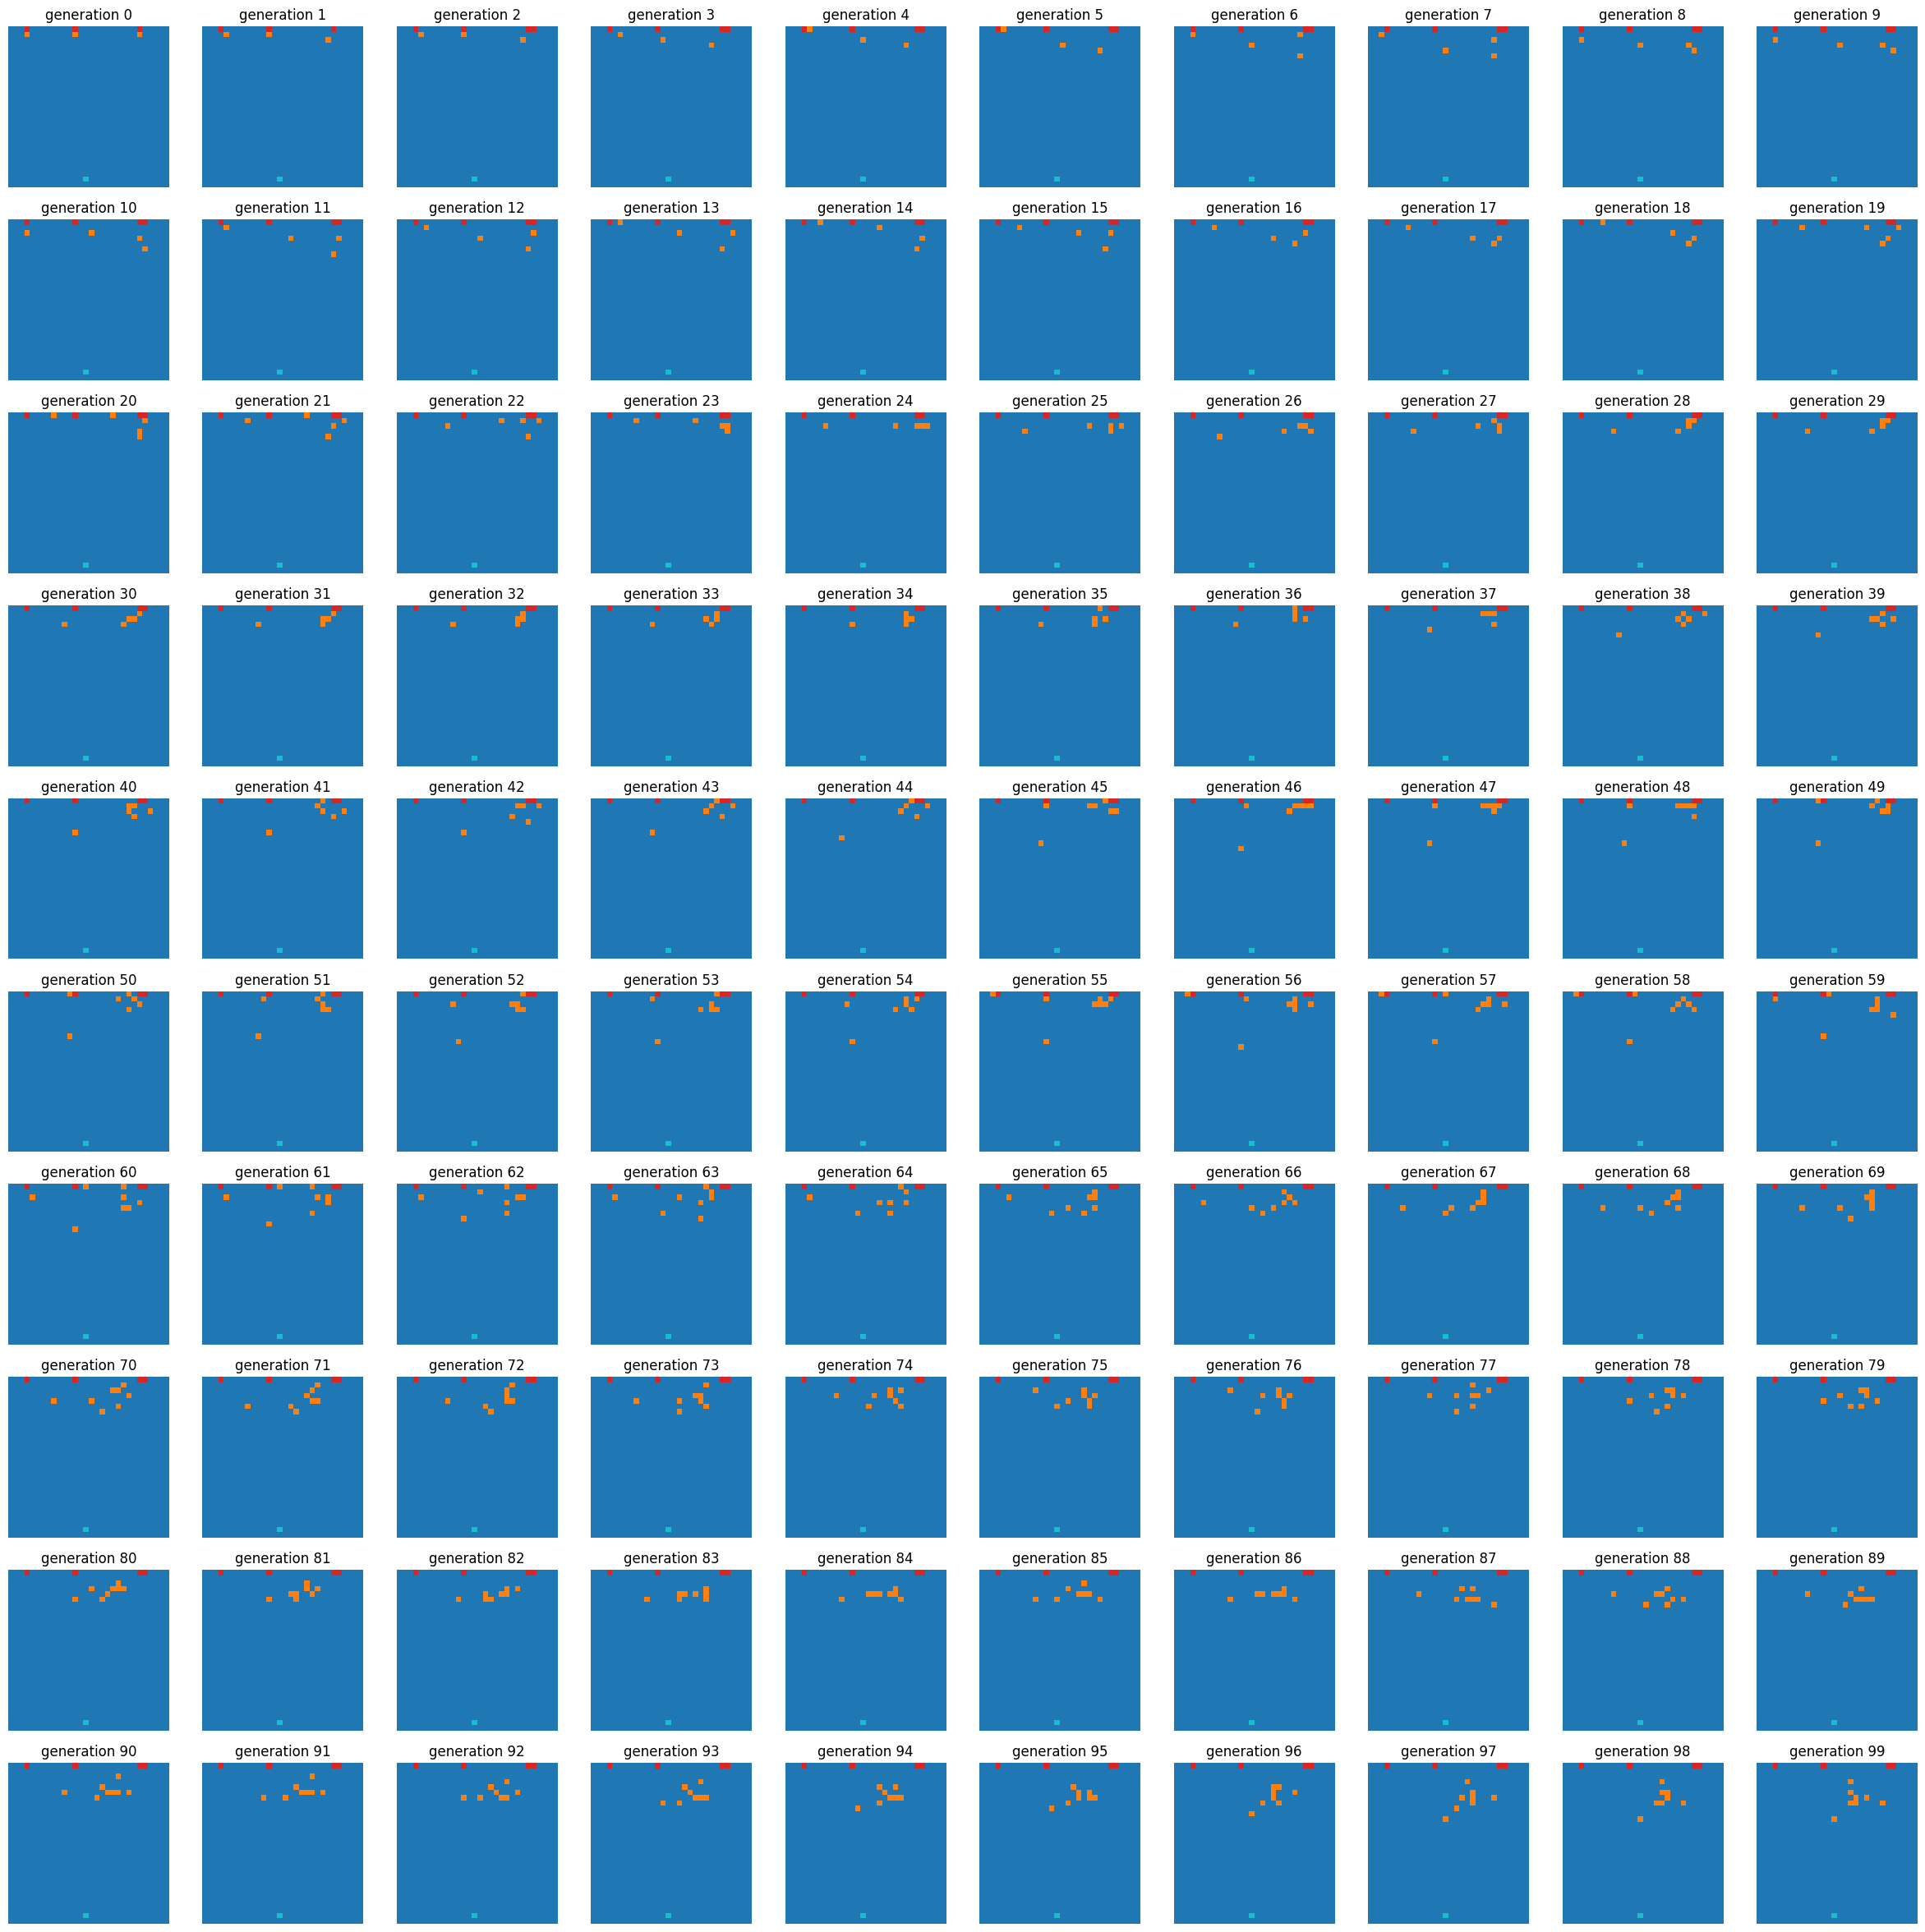

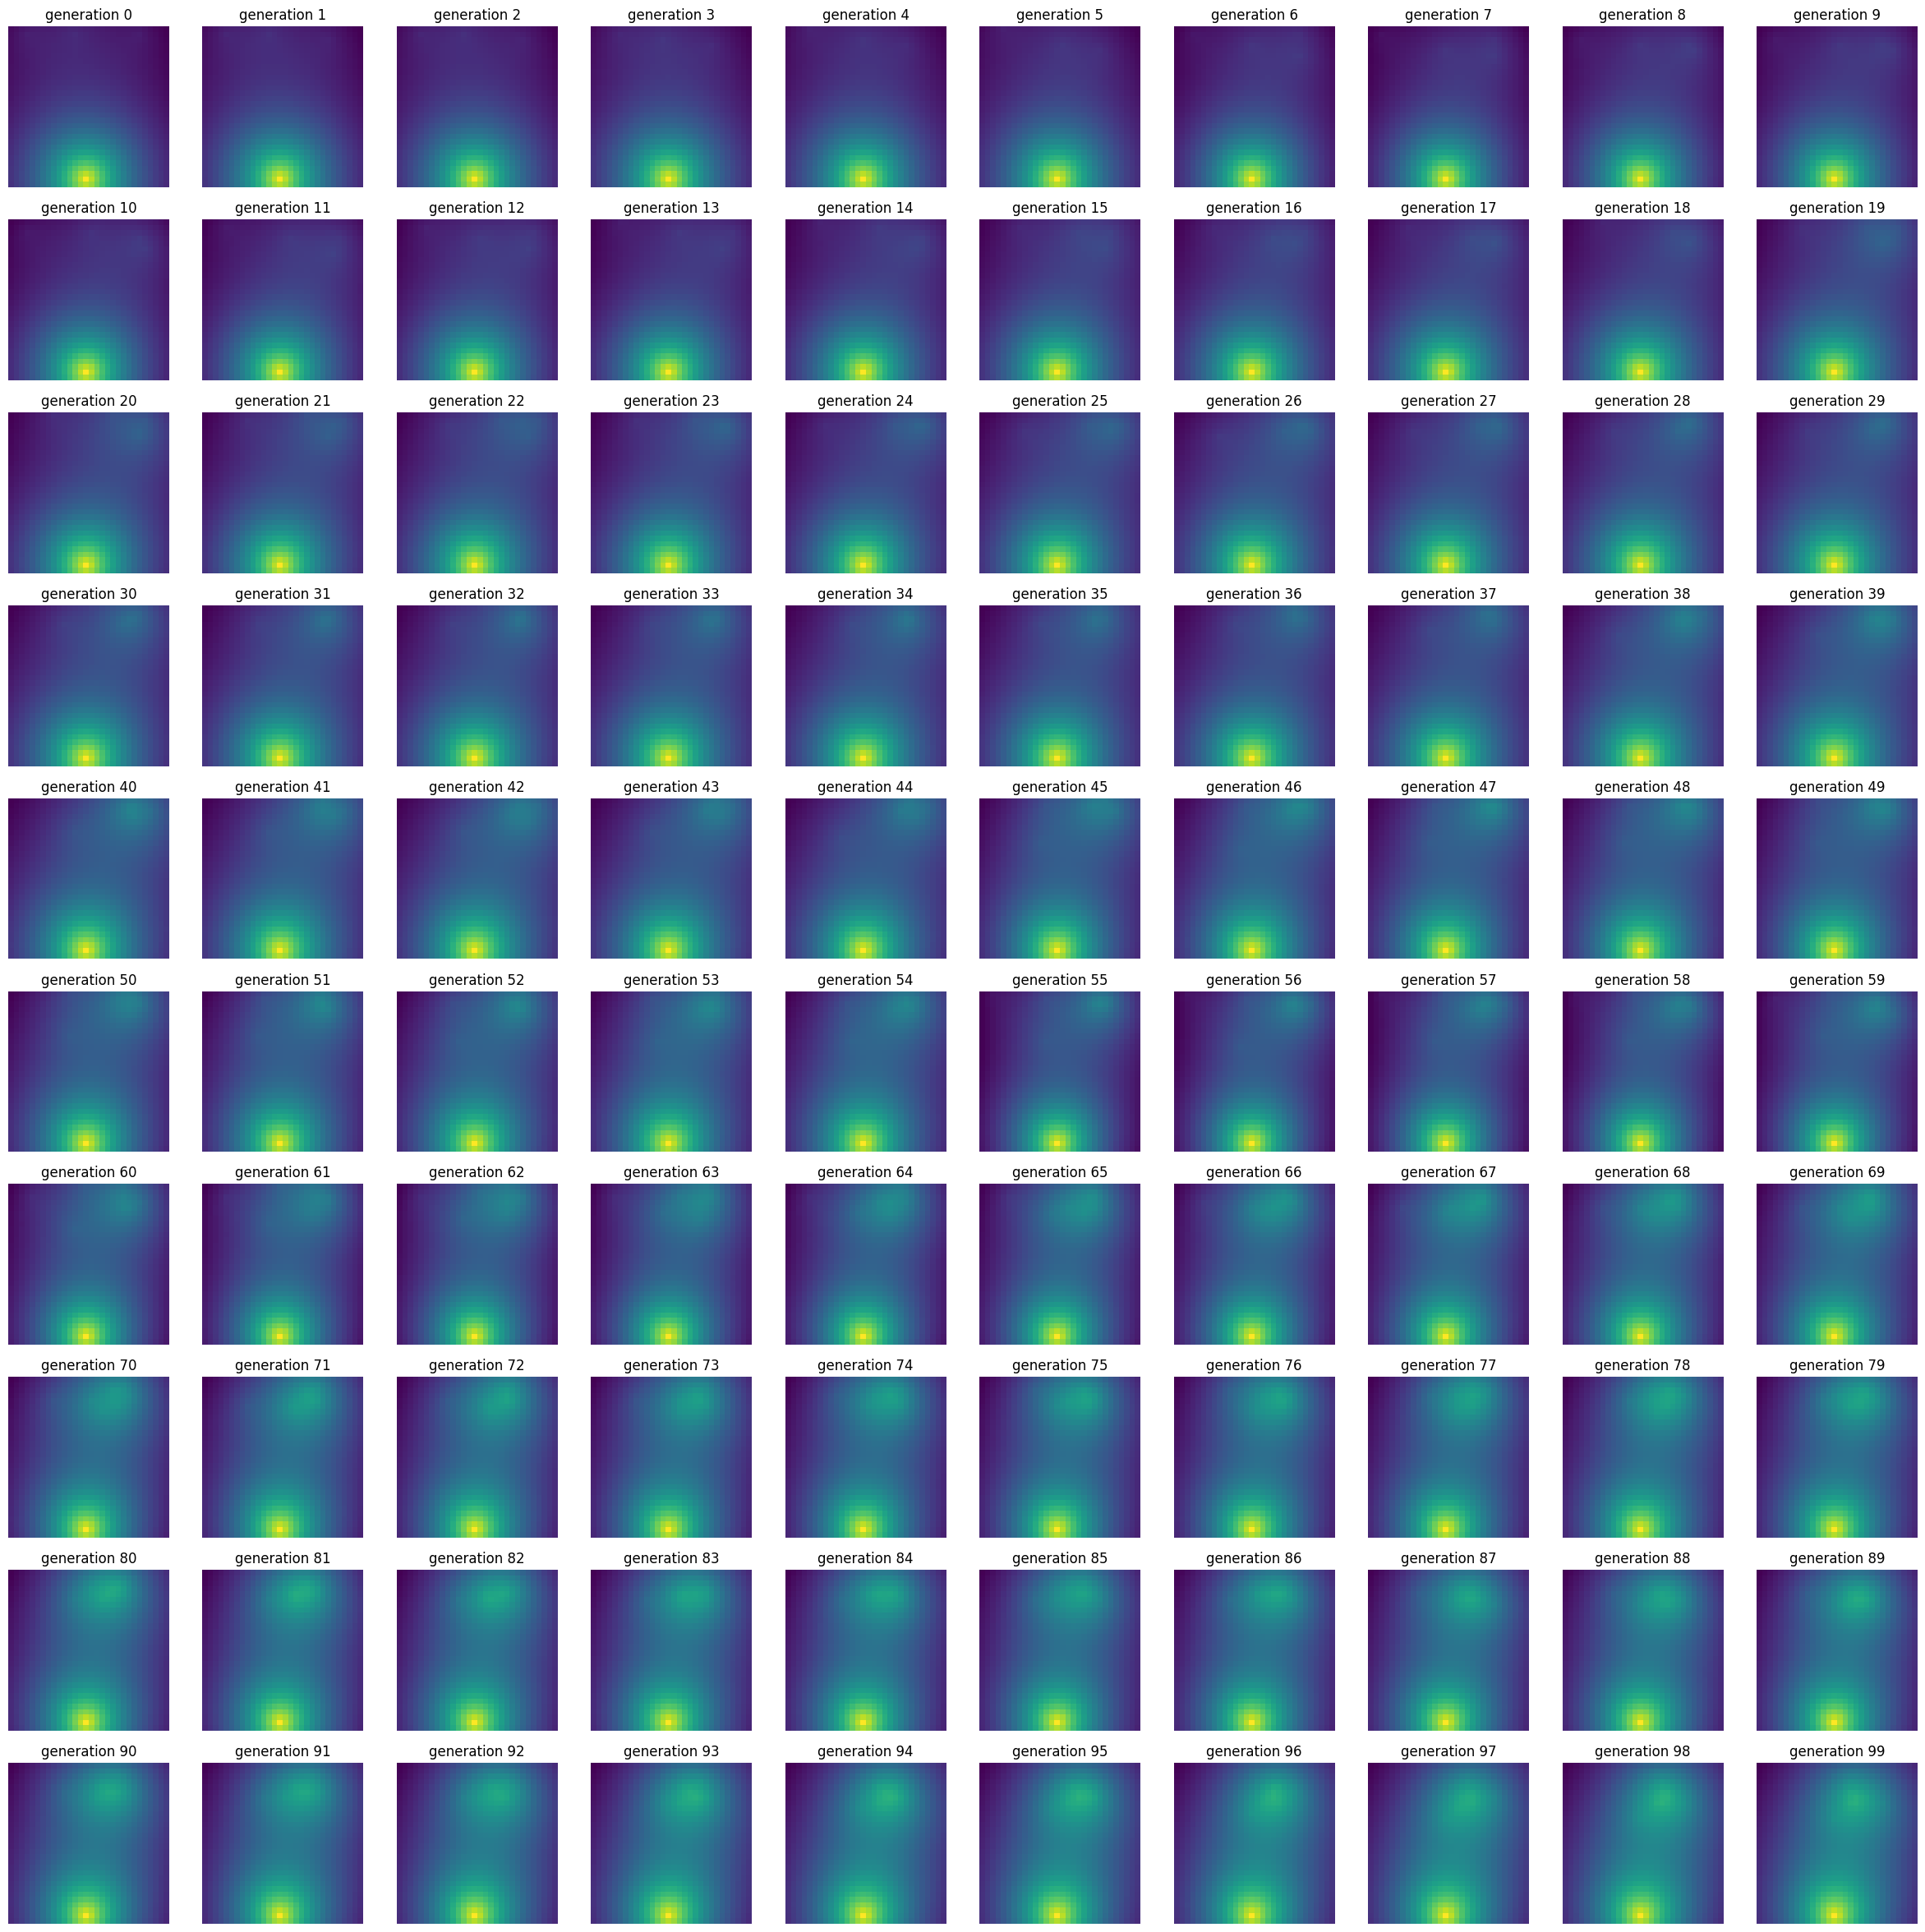

In [2]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'stalk_cells': [Point(0,3),Point(0,12),Point(0,24) ],
#                'tip_cells': [ Point(1,3),Point(1,12),Point(1,24)],
                'attractor_cells': [Point(28,14)]
              }
grid = Grid(width=30, height=30, init_config=init_config)
engine = Engine(init_grid=grid, generations=100)
engine.run()
engine.visualize()
engine.visualize_potential()

In [ ]:
engine.visualize()